<br><br>
<div style="text-align: center">
<span style="color:black; font-size:50px; font-family: Cambria; text-align: center"><b>MultipathLocationEstimator tutorials</b></span>
<br><br>
</div>

<span style=" font-size:19px; font-family: Calibri">MultipathLocationEstimator is an open-source Python class for link-level simulations over 5G digital communication systems, which contains several estimation algorythms for <b>user equipment</b> (UE) positioning.
</span>

<span style=" font-size:19px; font-family: Calibri">The official documentation can be found <a href="https://htmlpreview.github.io/?https://github.com/gomezcuba/py5g/blob/dev-locator/MultipathLocationEstimator.html"><u>here</u></a> </span>

<span style=" font-size:19px; font-family: Calibri">
To understand the use of this class, it has been created two jupyter notebooks that provides different examples of implementation of the system, from the simplest case to the hardest.
Futhermore, this work is structurated in:
</span>

<span style=" font-size:25px; font-family: Calibri"><b>1. <a href="#abajo"><u>First tutorial: Getting Started with  MultipathLocationEstimator</u></a></b>
</span>

<span style=" font-size:20px; font-family: Calibri">2. <a href=https://github.com/gomezcuba/py5g/blob/dev-locator/Tutorial_2_MultipathLocationEstimator.ipynb><u>Second tutorial: MultipathLocationEstimator, estimation algorythms</u></a>
</span>
<br><br><br>

<span name="abajo" style="color:black; font-size:35px; font-family: Cambria"><b>First tutorial: Getting Started with  MultipathLocationEstimator</b>
</span>

<span style=" font-size:19px; font-family: Calibri">This first tutorial is focused in understanding the definition of the channel parameters between the <b>base station</b> (BS) and the UE. In other words, how it is established the coordinates and geometric system without going into detail in how the user position is computed.
</span>
<br><br>

<span style=" font-size:33px; font-family: Cambria"><b>Table of Contents:</b></span>
<br>

<div style = "text-indent: 30px">
    
<span style=" font-size:20px; font-family: Calibri; text-indent: 30px">1. <a href="#1.-Problem-statement">Problem statement</a>
</span>
        
<span style=" font-size:20px; font-family: Calibri">2. <a href="#2.-Geometric-system-representation">Geometric system representation</a>
</span>

<div style = "text-indent: 60px">
    
<span style=" font-size:20px; font-family: Calibri">2.1 <a href="#A">One multipath ray</a>
</span>
    
<span style=" font-size:20px; font-family: Calibri">2.2 <a href="#2.2-Constant-offset-error-model">Constant offset error model</a>
</span>

<div style = "text-indent: 90px">

<span style=" font-size:20px; font-family: Calibri">2.2.1 <a href="#B">One multipath ray with random offset orientation</a>
</span>

<span style=" font-size:20px; font-family: Calibri">2.2.2 <a href="#C">N multipath ray with random offset orientation</a>
</span>

<div style = "text-indent: 30px">

<span style=" font-size:20px; font-family: Calibri">3. <a href="#References">References</a>
</span>   
<br>

<a class="anchor" id="1.-Problem-statement"></a>
<span style="color:black; font-size:33px; font-family: Calibri"><b>1. Problem statement</b></span><br>

<span style=" font-size:19px; font-family: Calibri">The main goal of the MultipathLocationEstimator class is try to recover the UE position trigonometrically, define as ($x_0$, $y_0$), estimating the value of the <b>UE offset orientation</b> ($\psi_0$) from the knowledge of the set of the <b>Angles Of Departure</b> ($AoD$), <b>Angles Of Arrival</b> ($AoA$) and the <b>delays</b> introduced by the multipath channels.
</span>

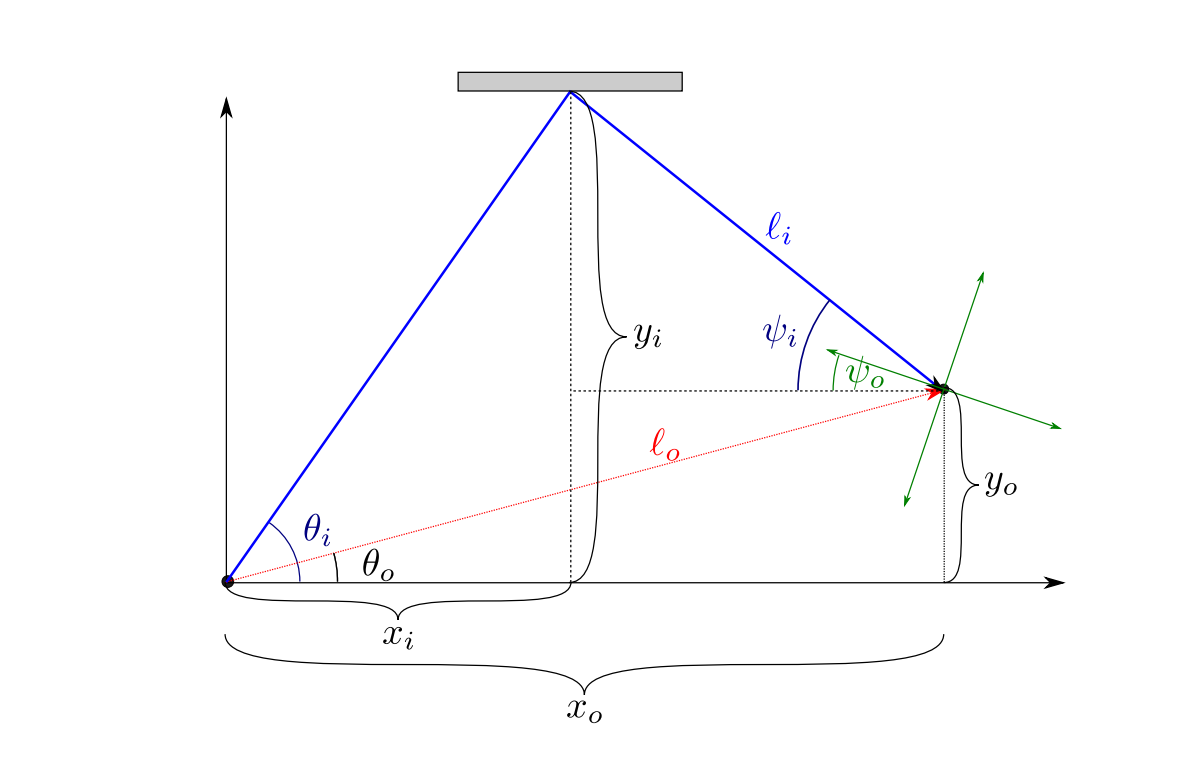

<span style=" font-size:19px; font-family: Calibri">The figure above shows a simple example of the teorical implementation of the problem. In this case the UE position is recovery with just using one scatter, that simulates one multipath channel in one of the two ray propagation paths. Moreover, the BS will be used as reference plane with coordinates [0,0].</span>

<span style=" font-size:19px; font-family: Calibri">In our reference system we are going to define two types of paths:</span>

<div style = "text-indent: 30px">
<div style = "background-color:#D0ECE7 ">

<br>

<span style=" font-size:19px; font-family: Calibri">-> <i><b>LOS</b> path</i>: line of sigth propagation path.</span>
<br><br>
    
<span style=" font-size:19px; font-family: Calibri">-> <i><b>NLOS</b> path</i>: non line of sigth propagation path, which contains one scatter.</span>
<br><br>
    
</div>
</div>

<br>
<span style=" font-size:19px; font-family: Calibri">The constrains and terminology used to describe the channel parameters along the notebooks are:</span>

<div style = "text-indent: 30px">
<div style = "background-color:#D0ECE7 ">
<br>

<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{\theta_i}$ (theta_i)</i> : angle of departure of the NLOS path from the BS.</span>
<br><br>
    
<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{\theta_0}$ (theta_0)</i> : angle of departure of the LOS path from the BS.</span>
<br><br>
    
<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{\psi_i}$ (psi_i)</i> : angle of arrival of the NLOS ray at the UE.</span>
<br><br>
   
<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{\psi_0}$ (psi_0) </i> : offset angle orientation, measured in the UE from the x-axis in the non-clockwise sense.</span>
<br><br>
    
<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{x_i}$ (x_i) </i> : coordinate x of a random scatter.</span><br><br>
    
<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{y_i}$ (y_i) </i> : coordinate y of a random scatter.</span><br><br>
    
<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{x_0}$ (x_0) </i> : coordinate x of a random UE.</span>
<br><br>
    
<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{y_0}$ (y_0) </i> : coordinate y of a random UE.</span>
<br><br>
    
<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{l_0}$ (l_0) </i> : LOS path lenth.</span>
<br><br>
   
<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{l_i}$ (l_i) </i> : NLOS path length.</span>
<br><br>
    
<span style=" font-size:19px; font-family: Calibri">-> <i><b> AoA </b></i>: Angle Of Arrival of the NLOS path, mesured in the UE from the positive x-axis in the non-colckwise sense till the
</span>
    
<span style=" font-size:19px; font-family: Calibri">NLOS path propagation. The value of \psi_0 can apply an offset orientation.</span>
<br><br>
        
<span style=" font-size:19px; font-family: Calibri">-> <i><b> AoD </b></i>: Angle Of Departure of the NLOS path, mesured in the BS from the positive x-axis in the non-colckwise sense till</span>

<span style=" font-size:19px; font-family: Calibri">the NLOS path propagation.</span>
<br><br>

<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{\tau_0}$ (tau_0) </i>: signal delay propagation measured in the LOS path signal propagation.</span>
<br><br>

<span style=" font-size:19px; font-family: Calibri">-> <i>$\pmb{\tau_i}$ (tau_i) </i>: signal delay propagation measured in the NLOS path signal propagation.</span>
<br><br>

<span style=" font-size:19px; font-family: Calibri">-> <i><b> dels </b></i>: set of the delays introduced by the NLOS path propagation as opposed to the LOS ones.</span>
<br><br>

<span style=" font-size:19px; font-family: Calibri">-> <i><b> c </b></i>: ligth speed (3e8 m/s) </span>
<br><br><br>
    
</div>
</div>

<br>
<span style=" font-size:19px; font-family: Calibri">We compute the sets of angles $\theta_0$, $\theta_i$ and $\psi_i$ as:</span>

<div style = "background-color:#FFF4A3 ; font-size:18px ">
<br>
    
\begin{equation}
\theta_0 = arctan\left(\frac{y_0}{x_0}\right)
\end{equation}

\begin{equation}
\theta_i = arctan\left(\frac{y_i}{x_i}\right)
\end{equation}

\begin{equation}
\psi_i = arctan\left(\frac{y_i-y_0}{x_0-x_i}\right)
\end{equation}
    
<br>

<br>
<span style=" font-size:19px; font-family: Calibri">And the path lengths and delays as:</span>

<div style = "background-color:#FFF4A3; font-size:18px  ">
<br>
\begin{equation}
l_0 = \left(\frac{y_0}{sin(\theta_0)}\right)
\end{equation}

\begin{equation}
\tau_0 = \left(\frac{l_0}{c}\right)
\end{equation}

\begin{equation}
l_i = \left(\frac{y_i}{sin(\theta_i)}\right) + \left(\frac{y_i-y_0}{sin(\psi_i)}\right)
\end{equation}
    
\begin{equation}
\tau_i = \left(\frac{l_i}{c}\right)
\end{equation}
    
\begin{equation}
dels = \tau_i-\tau_0
\end{equation}
    
<br>
</div>

<br><br>

<span style="color:black; font-size:28px; font-family: Cambria"><b> In this first tutorial you will learn how to: </b></span>
<br>

<div style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri">* Generate random positions for the UE.</span>
<br>
 
<span style=" font-size:19px; font-family: Calibri">* Generate random positions for the scatters.</span>
<br>
   
<span style=" font-size:19px; font-family: Calibri">* Obtain the value of the channel parameters.</span>
<br>
    
<span style=" font-size:19px; font-family: Calibri">* Understand the problem of UE offset orientation.</span>
<br>
    
<span style=" font-size:19px; font-family: Calibri">* Understand the relation of the $AoA$ and $\psi_0$ parameters.</span>
<br>
           
<span style=" font-size:19px; font-family: Calibri">* Plot the geometric system representation.</span>
<br><br><br>

<a class="anchor" id="2.-Geometric-system-representation"></a>

<span style="color:black; font-size:33px; font-family: Cambria"><b> 2. Geometric system representation </b></span>

<div style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri;">2.1 <a href="#A"> One multipath ray</a></span>

<a class="anchor" id="2.2-Constant-offset-error-model"></a>

<span style="color:black; font-size:28px; font-family: Cambria"><b> 2.2 Constant offset error model </b></span>
    
<span style=" font-size:19px; font-family: Calibri">In this notebook we will introduce a “constant offset” error model for the estimation of some of the channel parameters. We have talked about $\psi_0$, but not about the rol it plays in our analysis.
<br><br>
Therefore, at first step, we have to compute the values of our positionning system trigonometrically to obtain receiver’s $\theta_i$, $\psi_i$, ..., the unkowns to compute $AoA$, $AoD$ and $dels$ parameters. 
For our system representation, the Angle of Departure will be directly obtained trigonometrically from $\theta_i$ value.
\begin{equation}
AoD = \theta_i
\end{equation}
<br>
On the order hand, $AoA$ will not be as easy to compute. It's also directly related with the trigonometrically value of $\psi_i$, but we will need to estimate the value of $\psi_0$, which can affects $AoA$ measurement with a random orientation with regard to the transmision system.
\begin{equation}
AoA = \psi_i -\psi_0
\end{equation}
<br>
For the las parameter, $dels$, we will talk more in the following tutorial where we will introduce posible clock offset error present in the channel propagation.
<br><br>
Additionally, in this framework the angle offset due to receiver orientation is the same for all paths. We do not model individual independent noise components in the angular measurements.
</span>

<div style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri">2.2.1 <a href="#B"> One multipath ray with random offset orientation</a></span>
<br>

<span style=" font-size:19px; font-family: Calibri">2.2.2 <a href="#C"> N multipath ray with random offset orientation</a></span>
<br>

<br><br>

<span style="color:black; font-size:25px; font-family: Cambria"><b> Imports & Basics: </b></span>


In [112]:
#Import to use NumPy arrays
import numpy as np

#Import to create folders to save the images
import os

#Import for making plots 
import matplotlib.pyplot as plt

from scipy.ndimage.interpolation import rotate

from mpl_toolkits import mplot3d

plt.rcParams["figure.figsize"] = (18, 18)

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [113]:
#Create folders to save plots
Folder_dir = "Figures"
Folder_tutorial_1_dir = "tutorial_1"
Root_dir = os.path.dirname(os.path.abspath("Tutorial_1_MultipathLocationEstimator.ipyb"))

Folder_dir_path = os.path.join(Root_dir, Folder_dir)
Folder_tutorial_1_dir_path = os.path.join(Folder_dir_path, Folder_tutorial_1_dir)

#Check if the folders doesn't exist
if not os.path.exists(Folder_dir_path):
    os.makedirs(Folder_dir_path)  #### this command for creating directory

if not os.path.exists(Folder_tutorial_1_dir_path):
    os.makedirs(Folder_tutorial_1_dir_path)  #### this command for creating directory

<a class="anchor" id="A"></a>

<br><br><br>
<span style="color:black; font-size:28px; font-family: Cambria" name ="A"><b> 2.1 One multipath ray
</b></span><br>

<div style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri">-> One multipath channel.</span>
<br>

<span style=" font-size:19px; font-family: Calibri">-> One scatter.</span>
<br>
  
<span style=" font-size:19px; font-family: Calibri">-> One UE.</span>
<br>
  
<span style=" font-size:19px; font-family: Calibri">-> No offset orientation ($\psi_0 = 0$).</span>
<br>

In [114]:
# Number of scattering paths (number of scatters)
Npath = 1

In [115]:
# We generate a random location for one user in a 100m [-50 y 50] square
x_0 = np.random.rand(1)*100 - 50
y_0 = np.random.rand(1)*100 - 50

print("x_0 = ",x_0[0])
print("y_0 = ",y_0[0])

x_0 =  42.27380330581245
y_0 =  -4.63333687764279


In [116]:
# We generate Npath random locations for scatters in a 50m [-50 y 50] square
# We place one scatter in each NLOS path
x_i = np.random.rand(Npath,1)*100 - 50
y_i = np.random.rand(Npath,1)*100 - 50

print("x_i = ",x_i[0][0])
print("y_i = ",y_i[0][0])

x_i =  44.61967087533547
y_i =  -36.99667000975265


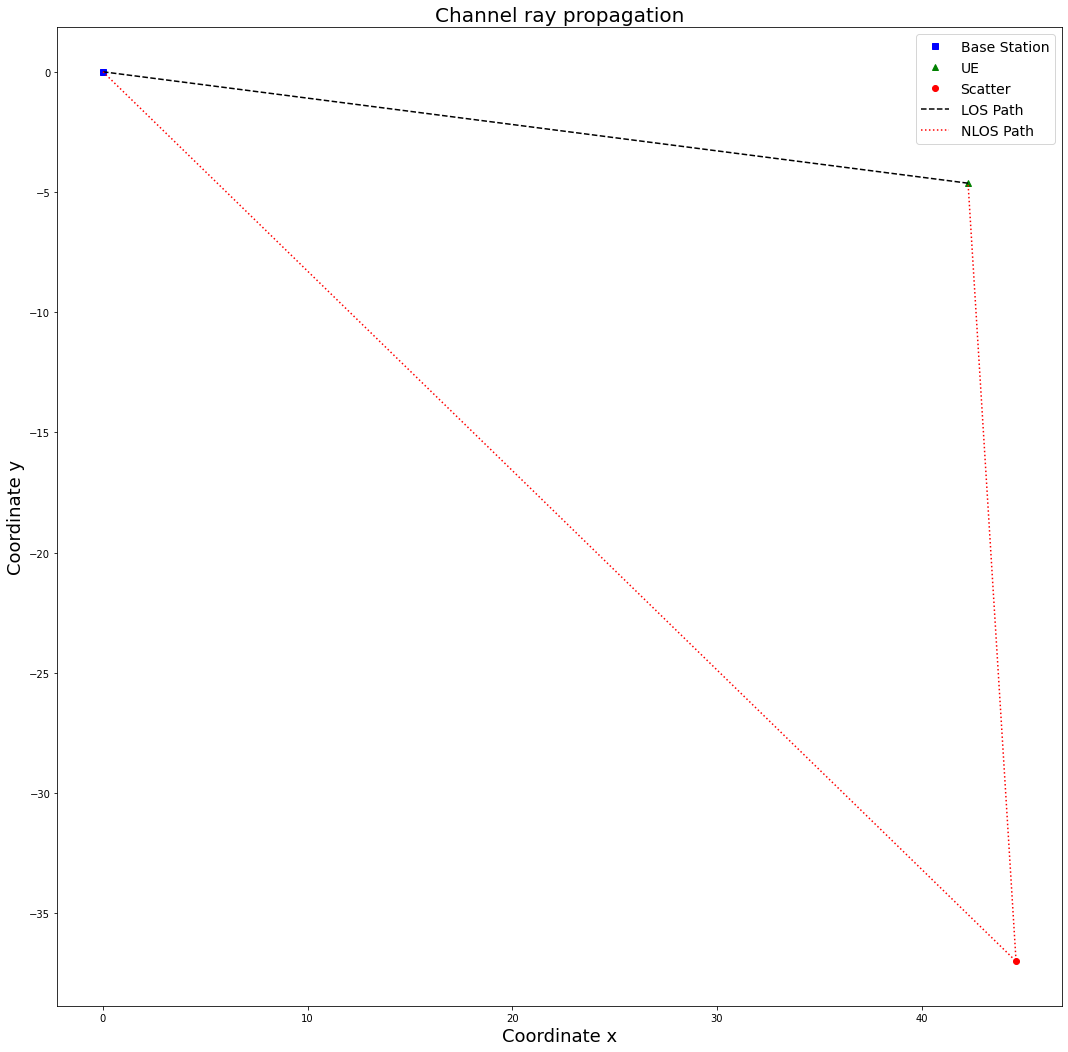

In [117]:
plt.figure(1)

# Plot the Base Station
plt.plot(0, 0, "sb", label="Base Station")

# Plot the user
plt.plot(x_0, y_0, "^g", label="UE")

# Plot the scatter
plt.plot(x_i, y_i, "or", label="Scatter")

# Plot LOS path
plt.plot([0,x_0], [0,y_0], "--k", label="LOS Path")

# Plot NLOS path
plt.plot([0,x_i,x_0], [0,y_i,y_0], ":r", label="NLOS Path")

plt.title("Channel ray propagation", fontsize=20)
plt.xlabel("Coordinate x", fontsize=18)
plt.ylabel("Coordinate y", fontsize=18)

# Make and plot legend
plt.legend(prop={"size": 14})

# Save Figure_2_1_A image
plt.savefig(Folder_tutorial_1_dir_path + "/Figure_2_1_A.png")

In [118]:
# All angles are in radians units
# With el mod operator, we substract 2pi from the angle if it is higher than 2pi
theta_0 = np.arctan(y_0/x_0)
theta_0 = np.mod(theta_0 + np.pi*(x_0 < 0), 2*np.pi)

theta_i = np.arctan(y_i/x_i)
theta_i = np.mod(theta_i + np.pi*(x_i < 0), 2*np.pi)

psi_i = np.arctan((y_i - y_0)/(x_0 - x_i))
psi_i = np.mod(np.pi - psi_i + np.pi*((x_0 - x_i) < 0), 2*np.pi)

print("theta_0 = ",np.rad2deg(theta_0[0]), "º")
print("theta_i = ",np.rad2deg(theta_i[0][0]), "º")
print("psi_i = ",np.rad2deg(psi_i[0][0]), "º")

theta_0 =  353.74517533648776 º
theta_i =  320.3359696886275 º
psi_i =  274.145853901783 º


In [119]:
AoD = np.mod(theta_i, 2*np.pi)

AoA = np.mod(psi_i, 2*np.pi)

print("AoD = ",np.rad2deg(AoD[0][0]), "º")
print("AoA = ",np.rad2deg(AoA[0][0]), "º")

AoD =  320.3359696886275 º
AoA =  274.145853901783 º


In [120]:
# Ligth speed
c = 3e8

# LOS path length
l_0 = abs(y_0/np.sin(theta_0))

# LOS path time delay
tau_0 = l_0/c

print("tau_0 = ",tau_0[0], "s")

tau_0 =  1.4175653057894845e-07 s


In [121]:
# NLOS path time delay
#l_i_1 = np.abs(y_i / np.sin(theta_i))
#tau_i_1 = l_i_1 / c

l_i = np.abs(y_i/np.sin(theta_i)) + np.abs((y_i - y_0)/np.sin(psi_i))
tau_i = l_i/c

print("tau_i = ",tau_i[0][0], "s")

tau_i =  3.013696358739417e-07 s


In [122]:
# Delay difference between LOS and NLOS paths
dels = tau_i - tau_0

print("delays = ",dels[0][0], "s")

delays =  1.5961310529499325e-07 s


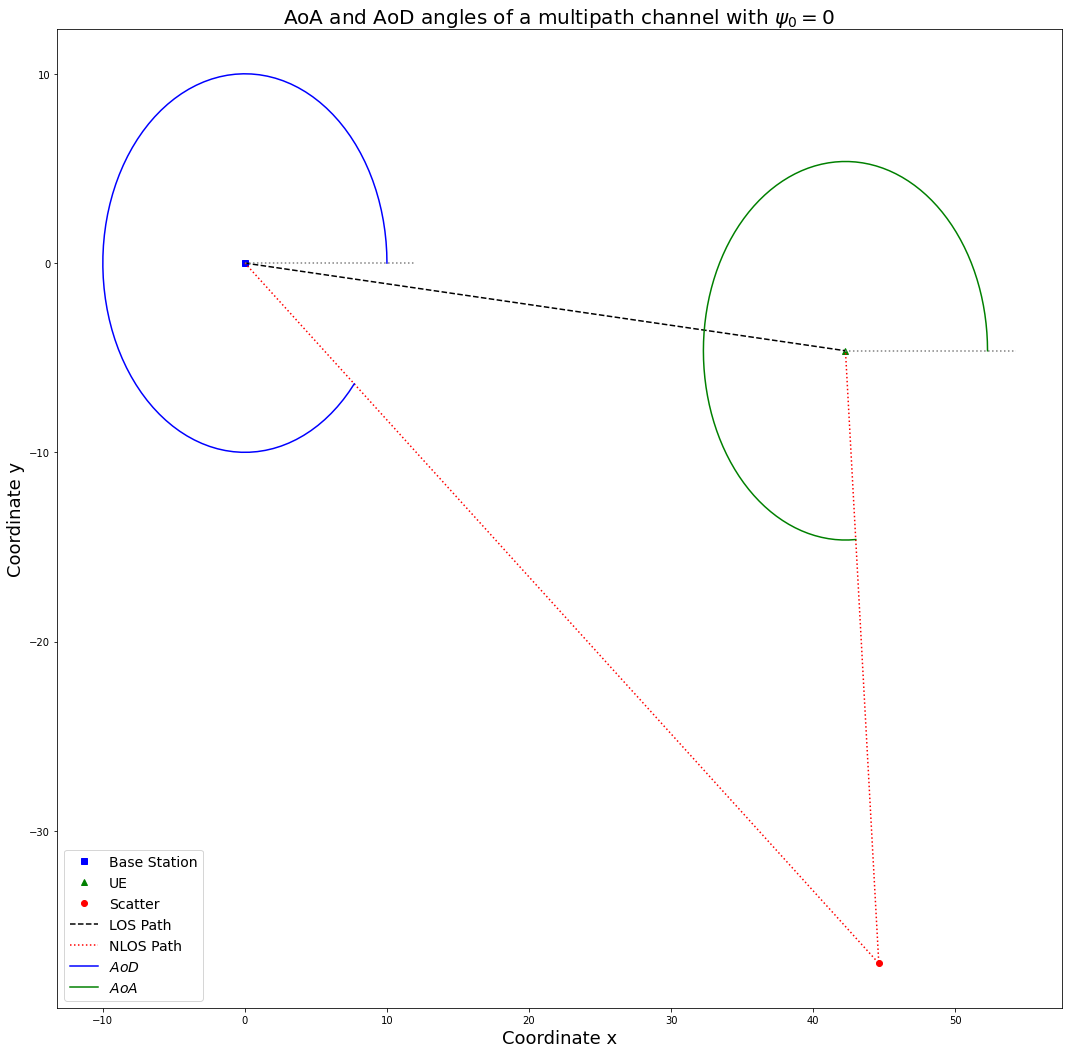

In [123]:
plt.figure(2)

# Plot the Base Station
plt.plot(0, 0, "sb", label="Base Station")

# Plot the user
plt.plot(x_0, y_0, "^g", label="UE")

# Plot the scatter
plt.plot(x_i, y_i, "or", label="Scatter")

# Plot LOS path
plt.plot([0,x_0], [0,y_0], "--k", label="LOS Path")

# Plot NLOS path
plt.plot([0,x_i[0],x_0], [0,y_i[0],y_0], ":r", label="NLOS Path")

# Number of points to draw angles circunferences and size respect each origin (Base Station or UE)
circle_points = 100
circle_scale = 10
t = np.linspace(0, 1, circle_points)

# Plot x axis reference line in the Base Station
plt.plot([0, circle_scale + 2], [0,0], ":", color="grey")

# Plot x axis reference line in the UE
plt.plot([x_0, x_0 + circle_scale + Npath*2], [y_0,y_0], ":" ,color="grey")
 
# Plot AoD angle
plt.plot(0 + (circle_scale)*np.cos(AoD[0]*t), 0 + (circle_scale)*np.sin(AoD[0]*t), "b" ,label="$AoD$")

# Plot AoA angle
plt.plot(x_0 + (circle_scale)*np.cos((AoA[0])*t), y_0 + (circle_scale)*np.sin((AoA[0])*t), "g", label="$AoA$")
    
plt.title("AoA and AoD angles of a multipath channel with $\psi_0=0$", fontsize=20)
plt.xlabel("Coordinate x", fontsize=18)
plt.ylabel("Coordinate y", fontsize=18)

# Make and plot legend
plt.legend(prop={"size": 14})

# Save Figure_2_1_B image
plt.savefig(Folder_tutorial_1_dir_path + "/Figure_2_1_B.png")

<a class="anchor" id="B"></a>

<br><br>
<span style="color:black; font-size:28px; font-family: Cambria"><b> 2.2.1 One multipath ray with random offset orientation </b></span>
<br>

<div style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri">-> One multipath channel.</span>
<br>
   
<span style=" font-size:19px; font-family: Calibri">-> One scatter.</span>
<br>
    
<span style=" font-size:19px; font-family: Calibri">-> One UE.</span>
<br>
   
<span style=" font-size:19px; font-family: Calibri; color:red">-> With offset orientation $\psi_0$.</span>
<br>

In [124]:
# We generate a random angle for UE offset
psi_0 = np.random.rand(1)*2*np.pi

print("psi_0 = ",np.rad2deg(psi_0[0]), "º")

psi_0 =  181.3870781448674 º


In [125]:
AoA = np.mod(psi_i - psi_0, 2*np.pi)

print("AoA = ",np.rad2deg(AoA[0][0]), "º")

AoA =  92.75877575691565 º


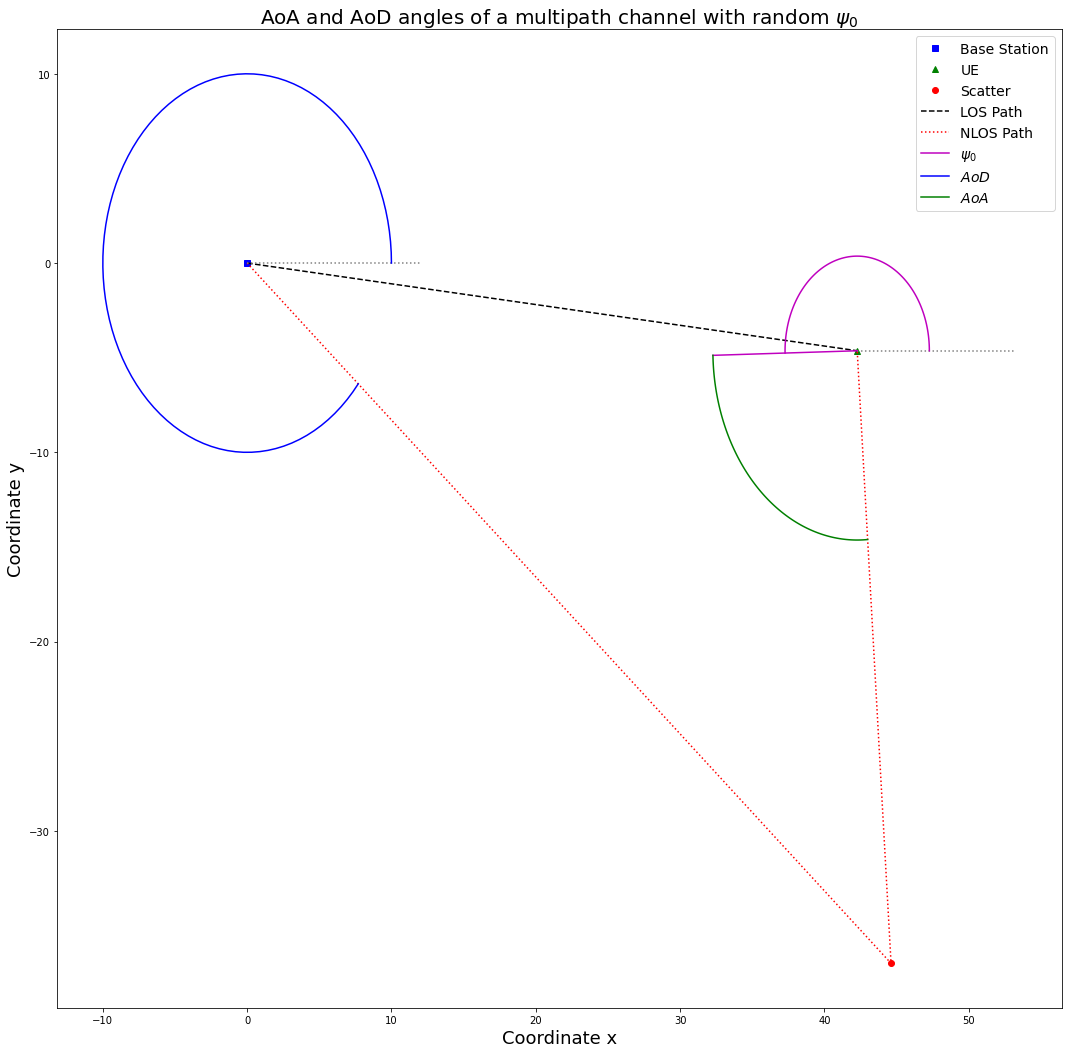

In [126]:
plt.figure(3)

# Plot the Base Station
plt.plot(0, 0, "sb", label="Base Station")

# Plot the user
plt.plot(x_0, y_0, "^g", label="UE")

# Plot the scatter
plt.plot(x_i, y_i, "or", label="Scatter")

# Plot LOS path
plt.plot([0,x_0], [0,y_0], "--k", label="LOS Path")

# Plot NLOS path
plt.plot([0,x_i[0],x_0], [0,y_i[0],y_0], ":r", label="NLOS Path")

# Number of points to draw angles circunferences and size respect each origin (Base Station or UE)
circle_scale = 10
circle_points = 100
t = np.linspace(0, 1, circle_points)

# Plot x axis reference lines
plt.plot([0, circle_scale + Npath*2], [0,0], ":", color="grey")
plt.plot([x_0, x_0 + circle_scale + Npath], [y_0,y_0], ":", color="grey")

# Plot phi_0 reference line
plt.plot([x_0, x_0 + np.cos(psi_0)*circle_scale], [y_0, y_0 + np.sin(psi_0)*circle_scale], color="m")

# Plot phi_0 angle
plt.plot(x_0 + (circle_scale/2)*np.cos((psi_0)*t), y_0 + (circle_scale/2)*np.sin((psi_0)*t), color="m" ,label="$\psi_0$")

# Plot AoD angle
plt.plot(0 + (circle_scale)*np.cos(AoD[0]*t), 0 + (circle_scale)*np.sin(AoD[0]*t), color="b", label="$AoD$")

# Plot AoA angle
x = np.array([(circle_scale)*np.cos(AoA[0]*t)])
y = np.array([(circle_scale)*np.sin(AoA[0]*t)])

rotated = np.concatenate((x, y), axis=0)

newX = rotated[0,:] * np.cos(psi_0) - rotated[1,:] * np.sin(psi_0)
newY = rotated[0,:] * np.sin(psi_0) + rotated[1,:] * np.cos(psi_0)

plt.plot(x_0 + newX, y_0 + newY, color="g",label="$AoA$")

plt.title("AoA and AoD angles of a multipath channel with random $\psi_0$", fontsize=20)
plt.xlabel("Coordinate x", fontsize=18)
plt.ylabel("Coordinate y", fontsize=18)

# Make and plot legend
plt.legend(prop={"size": 14})

# Save Figure_2_2_1 image
plt.savefig(Folder_tutorial_1_dir_path + "/Figure_2_2_1.png")

<a class="anchor" id="C"></a>

<br><br>
<span style="color:black; font-size:28px; font-family: Cambria"><b> 2.2.2 N multipath rays with random offset orientation </b></span>
<br>

<div style = "text-indent: 30px">

<span style=" font-size:19px; font-family: Calibri; color:red">-> N multipath channels.</span>
<br>
    
<span style=" font-size:19px; font-family: Calibri; color:red">-> N scatters.</span>
<br>
 
<span style=" font-size:19px; font-family: Calibri">-> One UE.</span>
<br>

<span style=" font-size:19px; font-family: Calibri">-> With offset orientation $\psi_0$.</span>
<br>

In [127]:
# Number of Multipath paths, also the number of scatters
Npath = 5

In [128]:
#We generate a random location for one user in a 100m [-50 y 50] square
x_0 = np.random.rand(1)*100 - 50
y_0 = np.random.rand(1)*100 - 50

In [129]:
#We generate Npath random locations for scatters in a 50m [-50 y 50] square
x_i = np.random.rand(Npath,1)*100 - 50
y_i = np.random.rand(Npath,1)*100 - 50

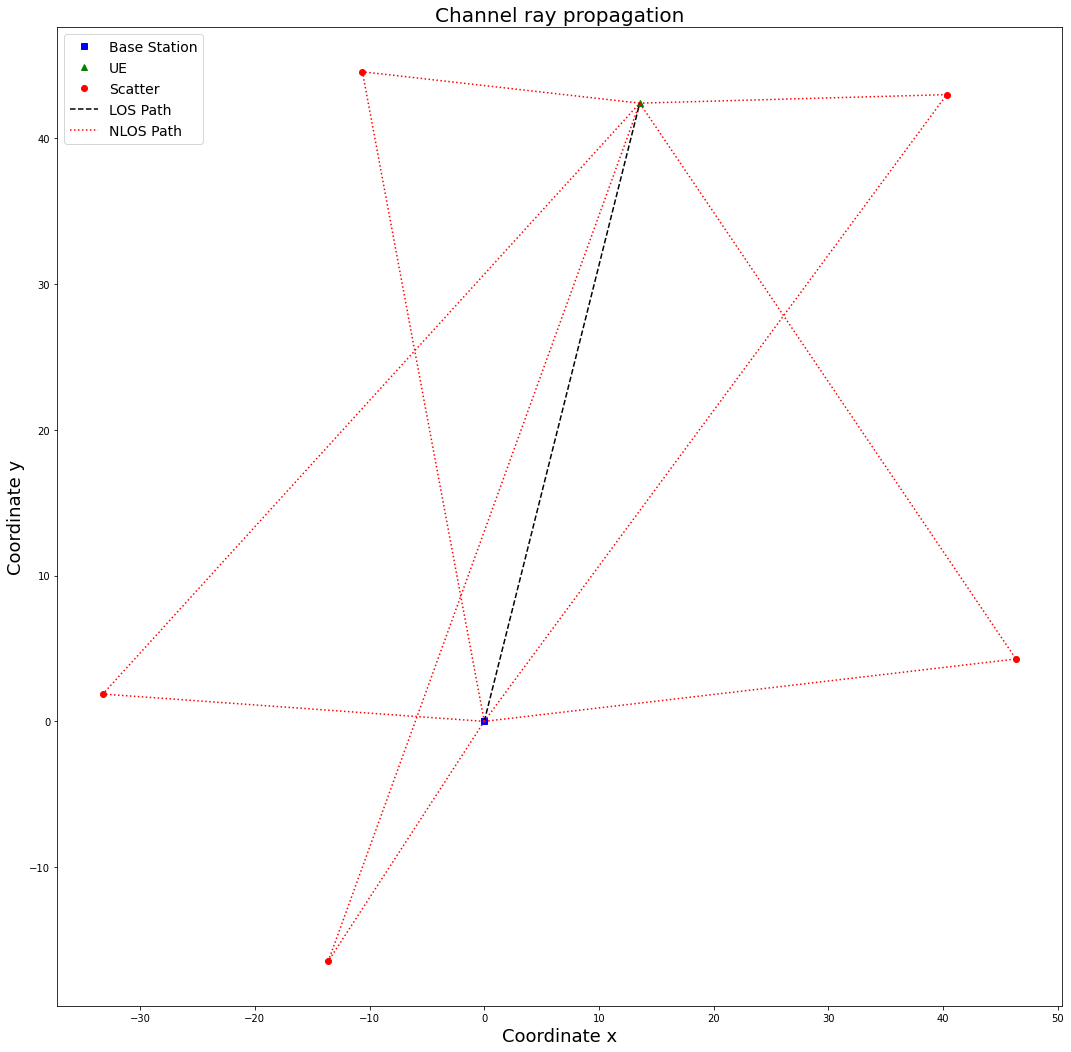

In [130]:
plt.figure(4)

# Plot the Base Station
plt.plot(0, 0, "sb", label="Base Station")

# Plot the user
plt.plot(x_0, y_0, "^g", label="UE")

# Plot the scatter
plt.plot(x_i, y_i, "or", label="Scatter")

# Plot LOS path
plt.plot([0,x_0], [0,y_0], "--k", label="LOS Path")

# Plot NLOS path
for p in range(Npath):
    plt.plot([0,x_i[p],x_0], [0,y_i[p],y_0], ":r", label="NLOS Path")    

plt.title("Channel ray propagation", fontsize=20)
plt.xlabel("Coordinate x", fontsize=18)
plt.ylabel("Coordinate y", fontsize=18)

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 14})

# Save Figure_2_2_2_A image
plt.savefig(Folder_tutorial_1_dir_path + "/Figure_2_2_2_A.png")

In [131]:
# All angles are in radians units
# With el mod operator, we substract 2pi from the angle if it is higher than 2pi
theta_0 = np.arctan(y_0/x_0)
theta_0 = np.mod(theta_0 + np.pi*(x_0 < 0), 2*np.pi)

theta_i = np.arctan(y_i/x_i)
theta_i = np.mod(theta_i + np.pi*(x_i < 0), 2*np.pi)

psi_i = np.arctan((y_i - y_0)/(x_0 - x_i))
psi_i = np.mod(np.pi - psi_i + np.pi*((x_0 - x_i) < 0), 2*np.pi)

In [132]:
#We generate a random angle for UE offset
psi_0 = np.random.rand(1)*2*np.pi

print("psi_0 = ",np.rad2deg(psi_0[0]), "º")

psi_0 =  305.3041750660217 º


In [133]:
AoD = np.mod(theta_i, 2*np.pi)

AoA = np.mod(psi_i - psi_0, 2*np.pi)

In [134]:
# Ligth speed
c = 3e8

# LOS path length
l_0 = abs(y_0/np.sin(theta_0))

# LOS path time delay
tau_0 = l_0/c

In [135]:
# NLOS path time delay
#l_i_1 = np.abs(y_i / np.sin(theta_i))
#tau_i_1 = l_i_1 / c

l_i = np.abs(y_i/np.sin(theta_i)) + np.abs((y_i - y_0)/np.sin(psi_i))
tau_i = l_i/c

In [136]:
# Delay difference between LOS and NLOS paths
dels = tau_i - tau_0

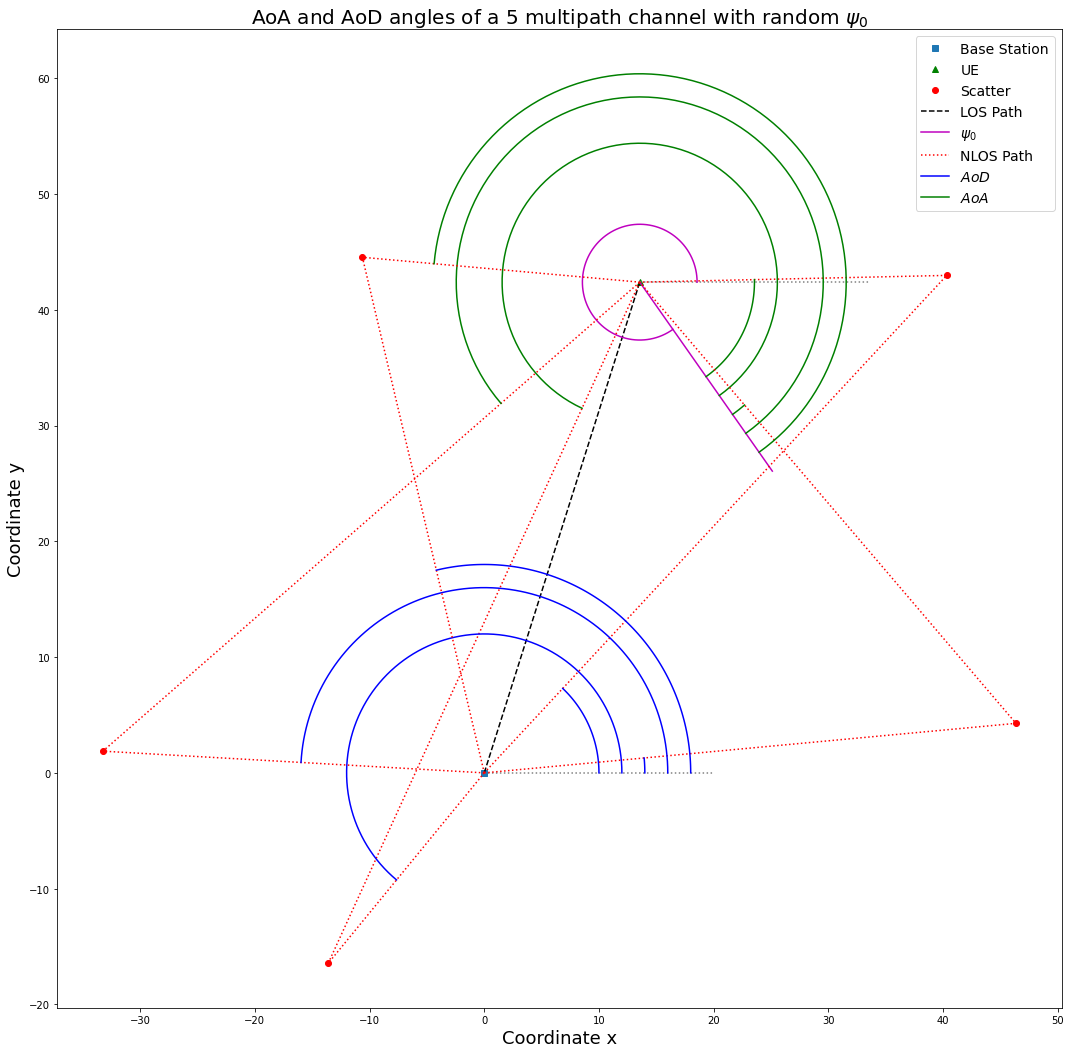

In [137]:
plt.figure(5)

# Plot the Base Station
plt.plot(0, 0, "s", label="Base Station")

# Plot the user
plt.plot(x_0, y_0, "^g", label="UE")

# Plot the scatter
plt.plot(x_i, y_i, "or", label="Scatter")

# Plot LOS path
plt.plot([0,x_0], [0,y_0], "--k", label="LOS Path")

# Number of points to draw angles circunferences and size respect each origin (Base Station or UE)
circle_scale = 10
circle_points = 100
t = np.linspace(0, 1, circle_points)

# Plot x axis reference lines
plt.plot([0, circle_scale + Npath*2], [0,0], ":", color="grey")
plt.plot([x_0, x_0 + circle_scale + Npath*2], [y_0,y_0], ":", color="grey")

# Plot psi_0 reference line
plt.plot([x_0, x_0 + np.cos(psi_0)*(circle_scale+Npath*2)], [y_0, y_0 + np.sin(psi_0)*(circle_scale+Npath*2)], color="m")

# Plot psi_0 angle
plt.plot(x_0 + (circle_scale/2)*np.cos((psi_0)*t), y_0 + (circle_scale/2)*np.sin((psi_0)*t), color="m", label="$\psi_0$")


for p in range(Npath):
    
    # Plot NLOS paths
    plt.plot([0,x_i[p],x_0], [0,y_i[p],y_0], ':r', label="NLOS Path")
    
    # Plot AoD angles
    plt.plot(0 + (circle_scale + p*2)*np.cos(AoD[p]*t), 0 + (circle_scale + p*2)*np.sin(AoD[p]*t), color="b", label="$AoD$")
    
    # Plot AoA angles
    x = np.array([(circle_scale + p*2)*np.cos(AoA[p]*t)])
    y = np.array([(circle_scale + p*2)*np.sin(AoA[p]*t)])
    
    rotated = np.concatenate((x, y), axis=0)
    
    newX = rotated[0,:] * np.cos(psi_0) - rotated[1,:] * np.sin(psi_0)
    newY = rotated[0,:] * np.sin(psi_0) + rotated[1,:] * np.cos(psi_0)
    
    plt.plot(x_0 + newX, y_0 + newY, color="g", label="$AoA$")

plt.title("AoA and AoD angles of a " + str(Npath) + " multipath channel with random $\psi_0$", fontsize=20)
plt.xlabel("Coordinate x", fontsize=18)
plt.ylabel("Coordinate y", fontsize=18)

# Create and avoid label repetitions in the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size": 14})

# Save Figure_2_2_2_B image
plt.savefig(Folder_tutorial_1_dir_path + "/Figure_2_2_2_B.png")

<span style="color:black; font-size:33px; font-family: Cambria"><b> 3. References </b></span>
<br>
<a class="anchor" id="References"></a>

[1] Multipath absolute clock recovery and location, Felipe Gomez-Cuba.